# Phase Contrast (PC) calculation tutorial

Start by importing the required libraries and defining some settings:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from ukat.data import fetch
from ukat.mapping.phase_contrast import PhaseContrast

# Ensure figures are rendered in the notebook
%matplotlib inline

Tell python where to store the Velocity NIfTI file we will generate. We will store it in a directory called `phase_calculation_output` in the `tutorials` directory.

In [2]:
# Initialise output path for B0 maps
directory = 'phase_calculation_output'
os.makedirs(directory, exist_ok=True)
OUTPUT_DIR = os.path.join(os.getcwd(), directory)

Retrieve PC test data using our data fetcher. The first time the fetcher is run, it will download the data from the
internet, after that it will just use the cached local data.

This will return 5 variables:
* `magnitude`: a 3D array with the magnitude data at all cardiac cycles.
* `vel_array`: a 3D array with the phase data at all cardiac cycles.
* `affine`: the affine matrix for the data (needed to later write a new NIfTI file).
* `mask`: a 3D boolean matrix with the pixels to fit/calculate.
* `velocity_encoding`: returns a float values of the velocity encoding in cm/s

In [3]:
# Fetch test data
magnitude, vel_array, mask, affine, velocity_encoding = fetch.phase_contrast_left_philips()

Calculate velocity and flow (RBF) parameters using the `PhaseContrast` class implemented in `mapping`:

In [4]:
# Initialise PC mapping object
mapper = PhaseContrast(vel_array, affine, mask=mask)

velocity_plot = mapper.mean_velocity_cardiac_cycle
rbf_plot = mapper.RBF

print("Mean Velocity: " + str(mapper.mean_velocity))
print("Mean RBF: " + str(mapper.mean_RBF))

# Save output maps to Nifti
mapper.to_nifti(output_directory=OUTPUT_DIR, base_file_name='Philips_Left')

Mean Velocity: 25.57730254026419
Mean RBF: 448.3799164652045


Plot the **velocity** and the **RBF** per cardiac cycle.

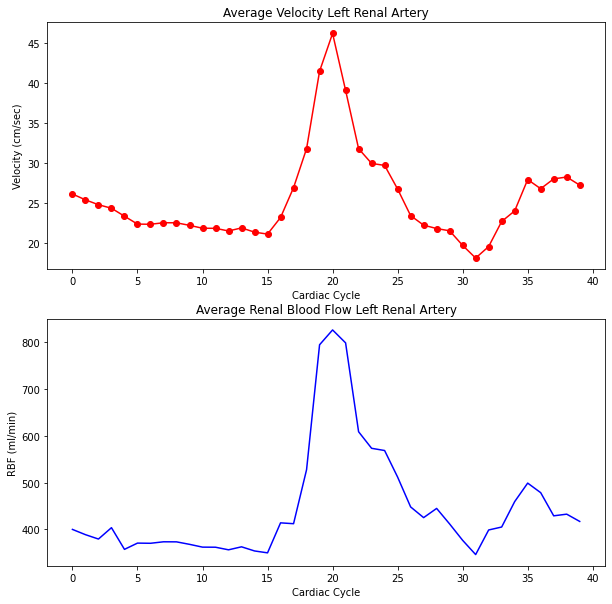

In [5]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Velocity
ax1.plot(velocity_plot, 'ro-')
ax1.set_ylabel('Velocity (cm/sec)')
ax1.set_xlabel('Cardiac Cycle')
ax1.set_title('Average Velocity Left Renal Artery')

# RBF
ax2.plot(rbf_plot, 'b-')
ax2.set_ylabel('RBF (ml/min)')
ax2.set_xlabel('Cardiac Cycle')
ax2.set_title('Average Renal Blood Flow Left Renal Artery')

plt.show()